# Acceleration and angular velocity of a train

- Date: August 2, 2018
- Location: A local line in Tokyo and Kanagawa

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 5]

SAMPLING_RATE = 80.0
GYRO_RESOLUTION = 250.0 / 32768.0
ACCEL_RESOLUTION = 2.0 / 32768.0
FILE = 'raw_data_mg09_mg10.csv'

In [28]:
df = pd.read_csv(FILE, dtype=np.int16)

gres = lambda v: v * GYRO_RESOLUTION
ares = lambda v: v * ACCEL_RESOLUTION
to_time = lambda v: v / SAMPLING_RATE
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(gres)
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(ares)
df[['cnt']] = df[['cnt']].apply(to_time)
df.set_index('cnt', drop=True, inplace=True)
#df.head()

Text(0,0.5,'Acceleration in G')

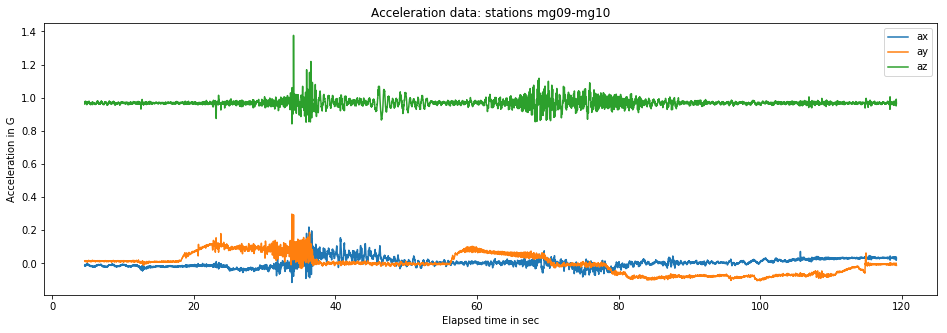

In [29]:
ax_a = df[['ax', 'ay', 'az']].plot(title='Acceleration data: stations mg09-mg10')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')

Text(0,0.5,'Angular velocity in dps')

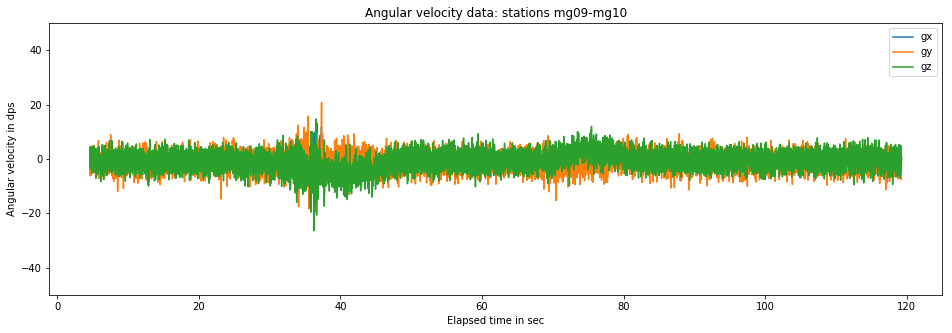

In [30]:
ax_g = df[['gx', 'gy', 'gz']].plot(ylim=[-50, 50], title='Angular velocity data: stations mg09-mg10')
ax_g.set_xlabel('Elapsed time in sec')
ax_g.set_ylabel('Angular velocity in dps')